# Polar plot for one category, multiple experiments

## Get experiments in this category

In [1]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'

In [2]:
targeted_structure = 'VISp'
imaging_depth = 175
cre_line = 'Cux2-CreERT2'

In [3]:
import warnings; warnings.simplefilter('ignore')
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

## Generate data

In [5]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

def get_avg_cell_polar_in_experiment(boc, ec_id, exp_id, cells):
    """
    Get the polar data for all cells in this experiment, then average them out to get a single polar data.
    """
    in_category_cells = cells[cells.experiment_container_id == ec_id]
    dg_response_filter = get_dg_response_filter_from_saskia()
    filtered_cells = get_filtered_cells(in_category_cells, dg_response_filter)
    filtered_cells = filtered_cells[filtered_cells.dsi_dg > 0.5]
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering, we have", len(filtered_cells), "cells")
    
    thetas = []
    rs = []
    cell_ids = []
    for cell_specimen_id in filtered_cells.cell_specimen_id:
        one_cell_polar_data_dict = get_avg_normalized_response(
            boc=boc,
            session_id=exp_id,
            cell_specimen_id = cell_specimen_id,
            temporal_frequency=2.0)
        if one_cell_polar_data_dict is None:
            continue
        theta, r = convert_polar_dict_to_arrays(one_cell_polar_data_dict)
        thetas.append(theta)
        rs.append(r)
        cell_ids.append(cell_specimen_id)
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    return agg_theta, agg_r

thetas = []
rs = []
for exp in exps
    e_id = exp['id']
    ec_id = exp['experiment_container_id']:
    print("Processing experiment", e_id)
    theta, r = get_avg_cell_polar_in_experiment(boc, ec_id, e_id, cells)
    thetas.append(theta)
    rs.append(r)

agg_theta, agg_r = get_avg_polar(thetas, rs)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(ax=axes,
    bold_theta = agg_theta,
    bold_r = agg_r,
    grey_thetas = thetas, 
    grey_rs = rs)

## Plot em

### Final result

NameError: name 'agg_theta' is not defined

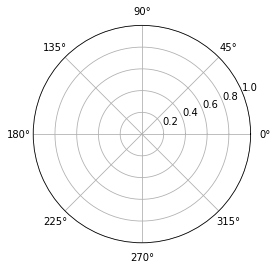

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(ax=axes,
    bold_theta = agg_theta,
    bold_r = agg_r,
    grey_thetas = thetas, 
    grey_rs = rs)

### Per experiment

In [ ]:
for i in range(len(exps)):
    e_id = exp['id']
    print ("exp id", e_id)
    fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    polar_plot(axes, thetas[i], rs[i])
    plt.show()

# Polar plot for all categories

In [ ]:
def plot_one_category(boc, axes, targeted_structure, imaging_depth, cre_line):
    exps = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS],
        targeted_structures = [targeted_structure],
        imaging_depths = [imaging_depth],
        cre_lines = [cre_line])
    print ("There are", len(exps), "experiments for ", targeted_structure, imaging_depth, cre_line)
    
    thetas = []
    rs = []
    for exp in exps:
        e_id = exp['id']
        ec_id = exp['experiment_container_id']
        print("Processing experiment", e_id)
        theta, r = get_avg_cell_polar_in_experiment(boc, ec_id, e_id, cells)
        thetas.append(theta)
        rs.append(r)

    agg_theta, agg_r = get_avg_polar(thetas, rs)
    polar_plot_population(ax=axes,
        bold_theta = agg_theta,
        bold_r = agg_r,
        grey_thetas = thetas, 
        grey_rs = rs)
    
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
plot_one_category(boc, axes, 'VISp', 175, 'Cux2-CreERT2')